In [2]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import h5py
import pandas as pd
import imageio

#this sets the size of the plot to something useful
plt.rcParams["figure.figsize"] = (20,20)

In [3]:
hf_higgs= h5py.File('higgs_100000_pt_250_500.h5', 'r')
hf_qcd = h5py.File('qcd_100000_pt_250_500.h5', 'r')

with h5py.File('qcd_100000_pt_250_500.h5', "r") as f:
    # List all groups
    for key in f.keys():
        print(key)

with h5py.File('higgs_100000_pt_250_500.h5', "r") as f:
    # List all groups
    for key in f.keys():
        print(key)

qcd_100000_pt_250_500
higgs_100000_pt_250_500


In [4]:
higgs_data = np.array(hf_higgs.get('higgs_100000_pt_250_500'))
qcd_background_data = np.array(hf_qcd.get('qcd_100000_pt_250_500'))
higgs_data

array([[ 4.72074292e+02,  1.37051933e-01, -2.53514528e+00, ...,
         3.83473901e-01,  6.16674158e-01,  5.57406805e-01],
       [ 4.70405678e+02, -3.91569464e-02,  6.96687614e-02, ...,
         3.13239811e-01,  8.25308189e-01,  7.04650207e-01],
       [ 4.38008357e+02, -1.81138694e-01, -3.03108291e+00, ...,
         4.39916683e-01,  4.96338176e-01,  4.87496134e-01],
       ...,
       [ 4.66920808e+02, -8.05493156e-01, -7.54702707e-01, ...,
         6.57692767e-01,  6.96196368e-01,  1.80727311e-02],
       [ 4.71611853e+02,  8.01812583e-01, -3.07788313e+00, ...,
         4.19343355e-01,  8.60960496e-01,  6.41891786e-01],
       [ 4.67029906e+02, -4.32315077e-01,  2.48393869e+00, ...,
         5.58198696e-01,  8.95642894e-01,  8.55158017e-01]])

In [5]:
## look into the paper for the higgs paper, click on tables, it will direct you to a table, for a lot of them for the parameters, explainations of what params mean in class
## Plot histograms of background, and actual data, to see differences
## Next step if there is correlation 
higgs_data_1 = pd.DataFrame(data=higgs_data, index=None, columns = ['pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1', 't2', 't3', 't21', 't32', 'KtDeltaR'])
qcd_background_data_1 = pd.DataFrame(data=qcd_background_data, index=None, columns = ['pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1', 't2', 't3', 't21', 't32', 'KtDeltaR'])

#for i in range(0,14):
#    higgs_data_1.iloc[:,i] = higgs_data[:,i]
#    qcd_background_data_1.iloc[:,i] = qcd_background_data[:,i]

higgs_data = higgs_data_1
qcd_background_data = qcd_background_data_1

In [35]:
backgrnd = stats.poisson.rvs(loc=0, mu=100, size=len(qcd_background_data['ee3']))
x = np.linspace(0,1000, len(qcd_background_data['ee3']))
prob_5_sig = 1/3.5e6
high_sigma = stats.poisson.ppf(1-prob_5_sig, mu = 100, loc =0)
low_sigma = stats.poisson.ppf(prob_5_sig, mu = 100, loc =0)
print(f'5 sigma value strength for a single pixel is between: {low_sigma} and {high_sigma}')

5 sigma value strength for a single pixel is between: 54.0 and 154.0


In [29]:
signal = stats.uniform.rvs(loc=500, scale=1, size=len(qcd_background_data['ee3']))
new_data = backgrnd + signal

edge_signal = np.linspace(0,500,200)
edge_data = np.linspace(0,500,200)

Text(0.5,1,'True Signal at a value of 500')

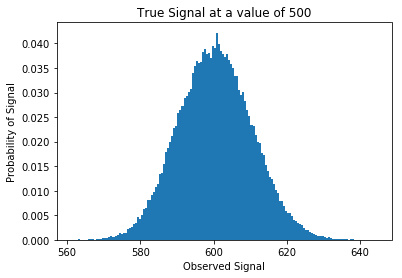

In [36]:
plt.hist(new_data, bins=150, density=True)
plt.xlabel('Observed Signal')
plt.ylabel('Probability of Signal')
plt.title('True Signal at a value of 500')

Text(0.5,0,'Observed data, $P(d|s)$')

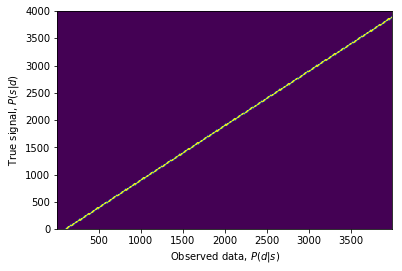

In [40]:
backgrnd = stats.poisson.rvs(loc=0, mu=100, size= 250*len(qcd_background_data['ee3']))
signal = stats.uniform.rvs(loc=0, scale=15000, size=250*len(qcd_background_data['ee3']))
new_data = backgrnd + signal

signal_edge = np.linspace(0,4000,300)
data_edge = np.linspace(0,4000,300)

## Did some research about histogram2d, this will help me plot the data
psd, x, y = np.histogram2d(new_data,signal, bins=[data_edge,signal_edge], density=True)
centered_data = (data_edge[:-1] + data_edge[1:]) / 2
signal_center = (signal_edge[:-1] + signal_edge[1:]) / 2
plt.pcolormesh(centered_data, signal_center, psd.transpose())
plt.ylabel('True signal, $P(s|d)$')
plt.xlabel('Observed data, $P(d|s)$')

In [41]:
new_table = pd.DataFrame(columns = ['Signal', 'Background', 'Data'])
new_table['Data'] = new_data
new_table['Signal'] = signal
new_table['Background'] = backgrnd

Text(0.5,1,'True Signal at a value of 500 of Observed Signal Spread')

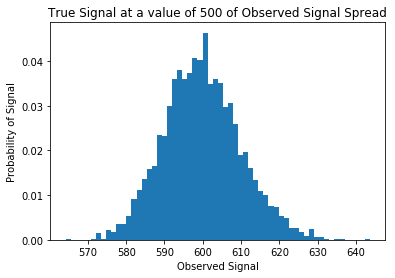

In [64]:
sig_500 = new_table.query(f'499 < Signal < 501')
plt.hist(sig_500['Data'], bins =60, density = True)
plt.xlabel('Observed Signal')
plt.ylabel('Probability of Signal')
plt.title('True Signal at a value of 500 of Observed Signal Spread')

Text(0.5,1,'Observed Signal at a value of 500 of possibility of true signal spread')

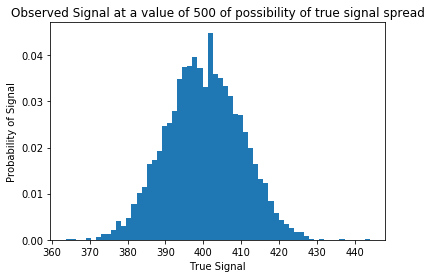

In [65]:
obs_sig_500 = new_table.query(f'499 < Data < 501')
plt.hist(obs_sig_500['Signal'], bins =60, density = True)
plt.xlabel('True Signal')
plt.ylabel('Probability of Signal')
plt.title('Observed Signal at a value of 500 of possibility of true signal spread')

In [66]:
hist, edges = np.histogram(obs_sig_500['Signal'], bins = 5000, density=True)
x=0
for i in range(0, len(edges)):
    if x < .165:
        p1 = x
        p2 = x
    else:
        print(f' {x:.5f}% and {edges[i]:.5f}')
        print(f' {x:.5f}% and {edges[-i]:.5f}')
        front_edge = edges[i]
        back_edge = edges[-i]
        break
    x = x + hist[i] + hist[-i]
print(f'1 sigma signal strength at: {front_edge} and {back_edge} which appear at distances from the mean: {front_edge-400} and {back_edge-400}')
        

 0.17895% and 372.96041
 0.17895% and 434.62301
1 sigma signal strength at: 372.96041022007364 and 434.6230091354661 which appear at distances from the mean: -27.03958977992636 and 34.62300913546608


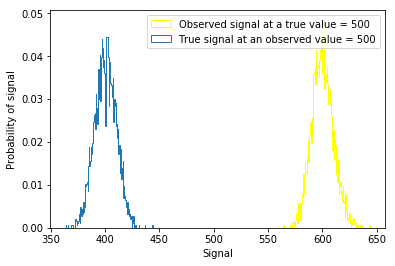

In [71]:
plt.hist(sig_500['Data'], bins =150, density = True, histtype='step', color='yellow', label="Observed signal at a true value = 500")
plt.hist(obs_sig_500['Signal'], bins =150, density = True, histtype='step', label="True signal at an observed value = 500")
plt.xlabel('Signal')
plt.ylabel('Probability of signal')
plt.legend()
